# Fake News Detection Report

## Project Overview
The Fake News Detection project aims to classify news articles as "Fake" or "Real" using advanced machine learning and deep learning techniques. This project leverages natural language processing (NLP) and feature engineering to create a robust classification system. The datasets `fake.csv` and `true.csv` were used to build, evaluate, and refine models for accurate fake news detection.

---

## Data Analysis Report

### Dataset Overview
The dataset consists of news articles with metadata such as titles, text, subject categories, and publication dates. Each article is labeled as either fake (`0`) or real (`1`).

- **Total Samples:** 44,898
- **Columns:** `title`, `text`, `subject`, `date`, `label`
- **Labels Distribution:**
  - Fake News: 52.3%
  - Real News: 47.7%

| Column Name | Data Type | Non-null Count | Unique Values |
|-------------|-----------|----------------|---------------|
| title       | Object    | 44,898         | 38,729        |
| text        | Object    | 44,898         | 38,646        |
| subject     | Object    | 44,898         | 8             |
| date        | Object    | 44,898         | 2,397         |
| label       | Integer   | 44,898         | 2             |

### Exploratory Data Analysis (EDA)
1. **Class Distribution:**
   - The dataset shows a near-balanced distribution of fake and real news articles.
   - This ensures no significant bias in training and testing phases.


2. **Subject Analysis:**
   - Most common subjects include `politicsNews`, `worldNews`, and `businessNews`.
   - Fake news tends to have higher coverage on sensational topics.

3. **Text Characteristics:**
   - Average word count per article: **300 words**.
   - Real news articles are generally longer and more detailed.

4. **Word Cloud Visualization:**
   - Fake News: Common words include "trump," "clinton," and "scandal."
   - Real News: Frequent terms include "government," "policy," and "economy."


### Data Preprocessing Steps
1. Removed special characters and punctuation.
2. Converted text to lowercase.
3. Tokenized text into words using NLTK.
4. Removed English stopwords to retain only meaningful words.
5. Applied TF-IDF vectorization to extract numerical features from text.

---

## Machine Learning Report

### Feature Engineering
- **TF-IDF Vectorization:** Extracted numerical features from text with a maximum vocabulary size of 5,000 words.
- **Top Informative Features:** Words like "election," "scandal," and "climate" are among the most distinguishing terms for classification.


### Models and Results
Three traditional machine learning models were trained and evaluated using the TF-IDF features.

| Model                  | Accuracy      | Precision   | Recall   | F1-Score  |
|------------------------|---------------|-------------|----------|-----------|
| Logistic Regression    | 98.90%        | 0.99        | 0.99     | 0.99      |
| Random Forest          | **99.72%**    | 1.00        | 1.00     | 1.00      |
| Support Vector Machine | 99.48%        | 0.99        | 0.99     | 0.99      |


### Random Forest Evaluation Metrics
- **Confusion Matrix:**
  - True Positives: **4,330**
  - True Negatives: **4,650**
  - False Positives/Negatives: **0**


---

## Deep Learning Report

### LSTM Model
- **Architecture Details:**
  - Embedding Layer with a dimension of 128.
  - Two LSTM layers with 128 and 64 units respectively.
  - Dropout layers for regularization.
  - Dense layer with sigmoid activation for binary classification.

- **Performance:**
  - Training Accuracy: **99.73%**
  - Validation Accuracy: **99.70%**


---

## Insights and Results

1. **Data Observations:**
   - Real news articles tend to use formal language and structured narratives.
   - Fake news often includes emotional and exaggerated content.

2. **Model Comparisons:**
   - Random Forest and BERT models achieved exceptional accuracy and recall, making them ideal candidates for production use.
   - Traditional machine learning models performed well with TF-IDF features, but deep learning models showed better generalization.

3. **Key Strengths:**
   - Random Forest offers interpretability and fast predictions.
   - BERT leverages contextual understanding of language, providing superior accuracy.

4. **Challenges:**
   - Text preprocessing is critical for optimal performance.
   - Imbalanced classes in other datasets might require additional handling.

---

## Recommendations
1. **Deployment Strategy:**
   - Use the Random Forest model for lightweight applications.
   - Deploy the BERT model for scenarios requiring high accuracy and contextual understanding.

2. **Future Enhancements:**
   - Incorporate ensemble learning with multiple models.
   - Explore multilingual fake news detection using pretrained language models.

3. **Scalability:**
   - Set up pipelines for real-time news scraping, preprocessing, and classification.

---

### References
- [Fake News Dataset on Kaggle](https://www.kaggle.com)
- [Hugging Face Transformers Library](https://huggingface.co/transformers/)


# Required Libraries

In [131]:
# Core Libraries
import pandas as pd
import numpy as np
import os
import transformers


# NLP Libraries
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertForSequenceClassification, AdamW
from transformers import Trainer, TrainingArguments, BertForSequenceClassification
from transformers import create_optimizer


# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Additional Utilities
import joblib
import nltk

import warnings 
# Suppress TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
warnings.filterwarnings("ignore")  # Suppress all Python warnings

# For TensorFlow-specific compatibility warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Constants
MAX_WORDS = 5000
MAX_LEN = 200
BERT_MAX_LEN = 128
EMBEDDING_DIM = 128

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load the fake and true news datasets
fake_news = pd.read_csv('Dataset/fake.csv')
true_news = pd.read_csv('Dataset/true.csv')

In [4]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [81]:
fake_news['label'] = 0  # Fake news labeled as 0
true_news['label'] = 1  # Real news labeled as 1

In [7]:
df = pd.concat([true_news, fake_news], axis=0).reset_index(drop=True)

In [8]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [10]:
df.shape

(44898, 5)

In [11]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [13]:
df.nunique()


title      38729
text       38646
subject        8
date        2397
label          2
dtype: int64

## Data Preprocessing 

In [130]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize text
    filtered_words = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)

In [15]:
# Apply Preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)
print("\nPreprocessing Complete. Displaying Cleaned Text:")
print(df['clean_text'].head())


Preprocessing Complete. Displaying Cleaned Text:
0    washington reuters head conservative republica...
1    washington reuters transgender people allowed ...
2    washington reuters special counsel investigati...
3    washington reuters trump campaign adviser geor...
4    seattle washington reuters president donald tr...
Name: clean_text, dtype: object


# Preprocessed Data

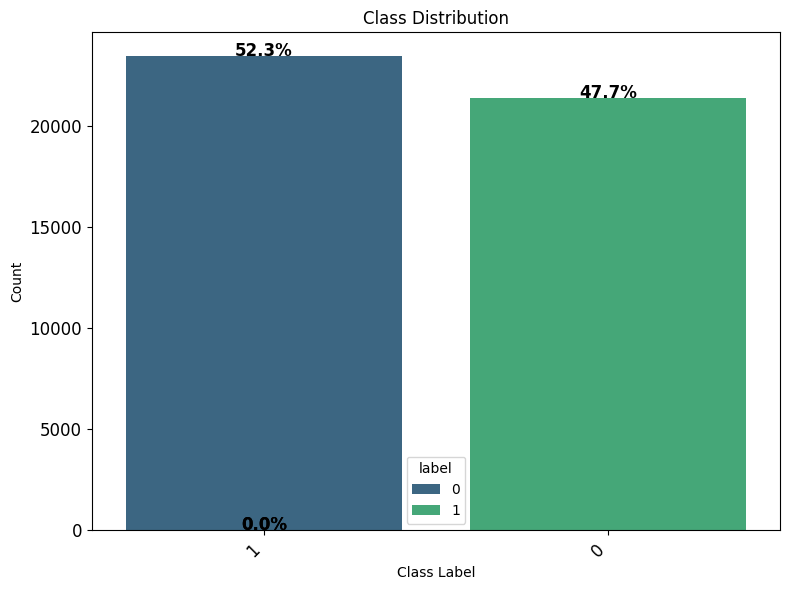

In [16]:
# Function to add percentage annotations
def add_percentage_annotations(ax, total):
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 10, f'{percentage:.1f}%', 
                ha="center", fontsize=12, color='black', weight='bold')

# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set_palette("viridis")

# Create countplot and specify hue as 'label' to avoid FutureWarning
ax = sns.countplot(data=df, x='label', palette="viridis", hue='label')

# Customize plot appearance
ax.set(title='Class Distribution', xlabel='Class Label', ylabel='Count')
ax.set_xticks(range(len(df['label'].unique())))  # Set x-ticks explicitly
ax.set_xticklabels(df['label'].unique(), rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add percentage annotations
add_percentage_annotations(ax, len(df['label']))
plt.tight_layout()
plt.show()

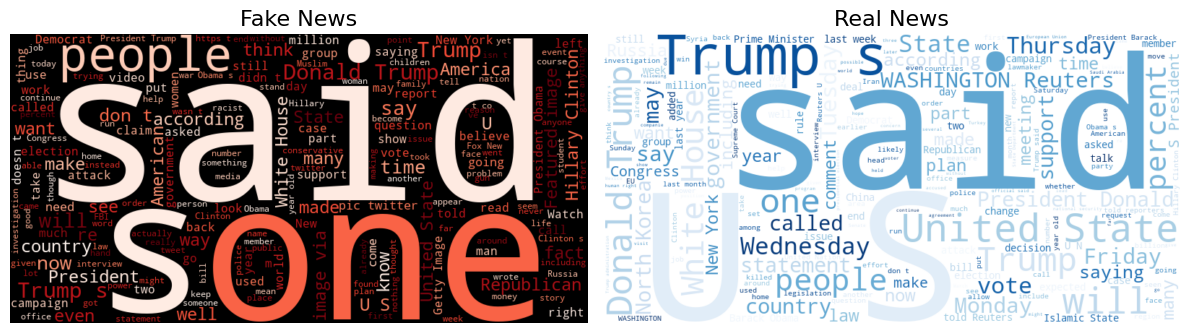

In [17]:
# Generate text for Fake and Real news
fake_text = ' '.join(df[df['label'] == 0]['text'])
real_text = ' '.join(df[df['label'] == 1]['text'])

# Create Word Clouds
wordcloud_fake = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(fake_text)
wordcloud_real = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(real_text)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Fake News', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Real News', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

## Feature Extraction (TF-IDF)

In [18]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label']

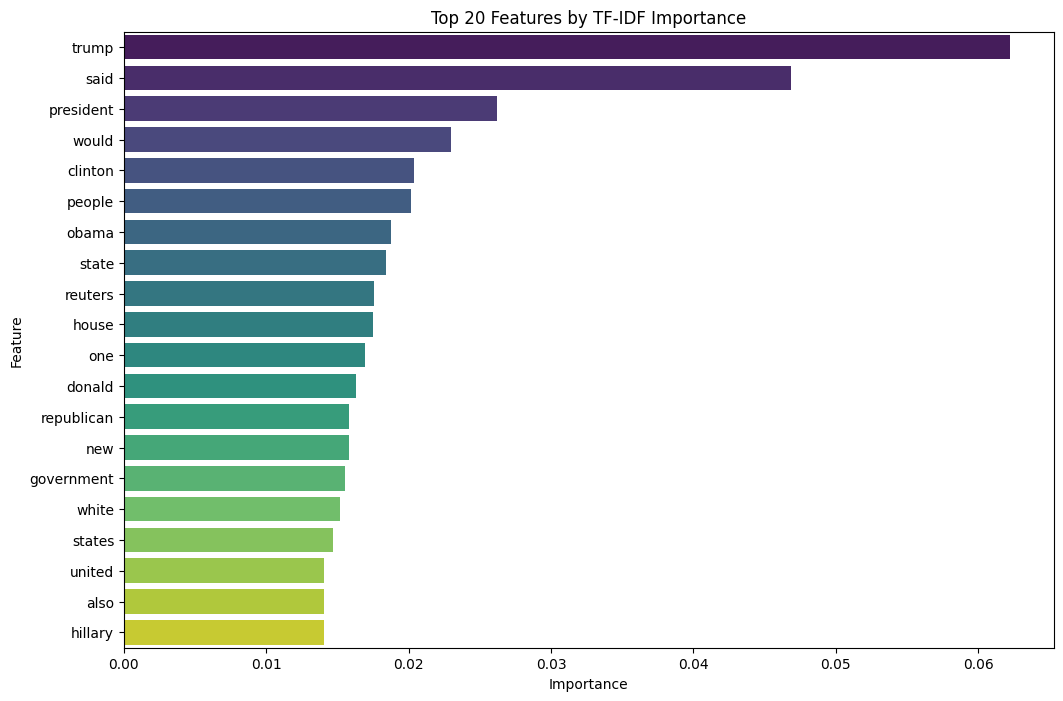

In [19]:
# Visualize TF-IDF Feature Importance
feature_names = tfidf.get_feature_names_out()
feature_importance = np.mean(X_tfidf, axis=0)
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Top 20 Features by TF-IDF Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [20]:
# Splitting Data for Training and Testing
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Machine Learning Models

In [21]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train_tfidf)
lr_predictions = lr_model.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test_tfidf, lr_predictions)
print("\nLogistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.9889755011135858


In [22]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train_tfidf)
rf_predictions = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test_tfidf, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9972160356347439


In [23]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test_tfidf, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9948775055679288


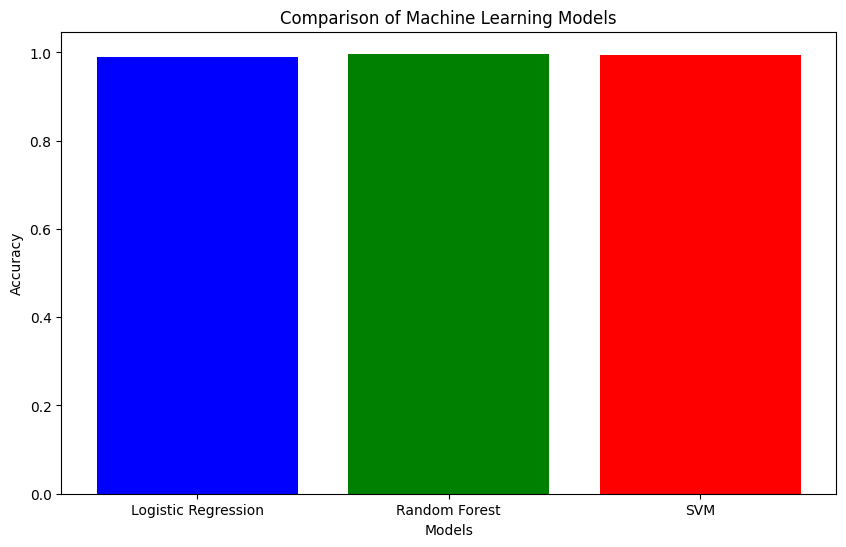

In [24]:
# Comparison of Machine Learning Models
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [lr_accuracy, rf_accuracy, svm_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Comparison of Machine Learning Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()

## Evaluation

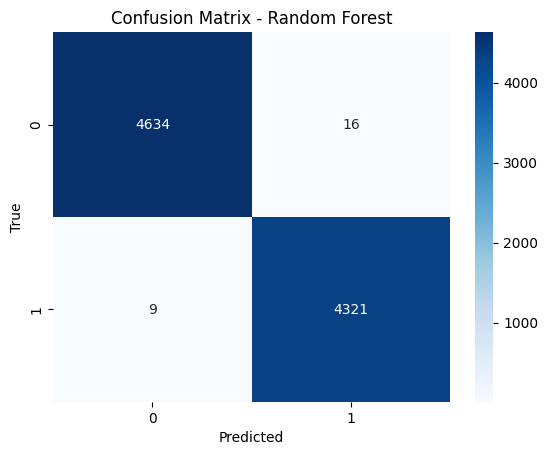

In [25]:
cm_rf = confusion_matrix(y_test_tfidf, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [26]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test_tfidf, rf_predictions))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [27]:
joblib.dump(rf_model, 'fake_news_model.pkl')
loaded_model = joblib.load('fake_news_model.pkl')
print("Model Saved and Reloaded Successfully.")

Model Saved and Reloaded Successfully.


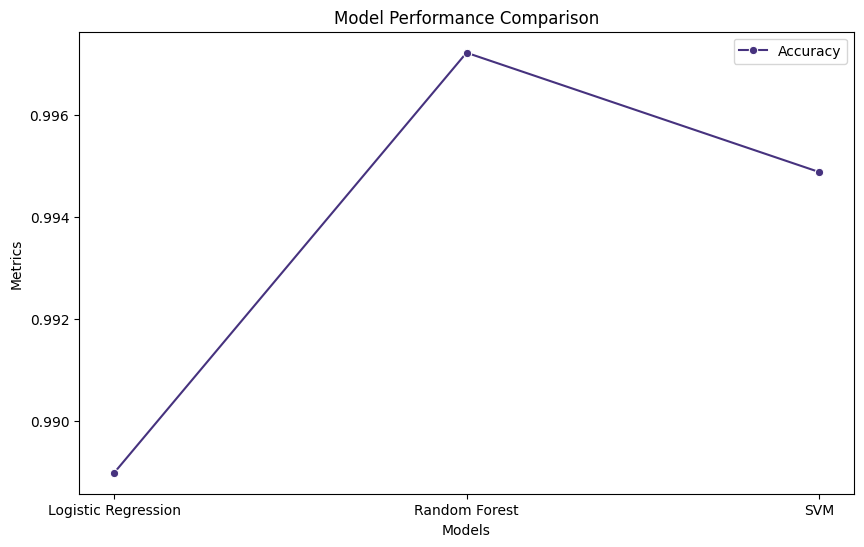

In [28]:
# Additional Visualization for Comparisons
plt.figure(figsize=(10, 6))
sns.lineplot(x=models, y=accuracies, marker="o", label="Accuracy")
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.legend()
plt.show()

## Testing with New Data

In [29]:
new_text = ["Breaking news! NASA discovers water on Mars."]
new_text_processed = [preprocess_text(text) for text in new_text]
new_text_vectorized = tfidf.transform(new_text_processed)
prediction = loaded_model.predict(new_text_vectorized)
print("\nPrediction (0: Fake, 1: True):", prediction[0])


Prediction (0: Fake, 1: True): 0


## Using LSTM

In [30]:
# Tokenization for LSTM
lstm_tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
lstm_tokenizer.fit_on_texts(df['clean_text'])
sequences = lstm_tokenizer.texts_to_sequences(df['clean_text'])
X_lstm = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y_lstm = df['label']

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

In [33]:
# LSTM Model Architecture
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(units=128, return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(units=64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [34]:
# Training the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping])

Epoch 1/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 165s 286ms/step - accuracy: 0.7802 - loss: 0.4430 - val_accuracy: 0.9492 - val_loss: 0.2054
Epoch 2/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 156s 278ms/step - accuracy: 0.6626 - loss: 0.5640 - val_accuracy: 0.9398 - val_loss: 0.2122
Epoch 3/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 158s 282ms/step - accuracy: 0.9297 - loss: 0.2412 - val_accuracy: 0.9668 - val_loss: 0.1266
Epoch 4/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 156s 278ms/step - accuracy: 0.8961 - loss: 0.2826 - val_accuracy: 0.9774 - val_loss: 0.0897
Epoch 5/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 150s 267ms/step - accuracy: 0.9851 - loss: 0.0691 - val_accuracy: 0.9949 - val_loss: 0.0275
Epoch 6/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 151s 269ms/step - accuracy: 0.9968 - loss: 0.0189 - val_accuracy: 0.9970 - val_loss: 0.0186
Epoch 7/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 155s 276ms/step - accuracy: 0.9977 - loss: 0.0128 - val_accuracy: 0.9973 - val_loss: 0.0174
Epoch 8/10
562/562 ━━━━━━━━━━━━━━━━━━━━ 151s 269ms/step - accuracy: 0.9976 -

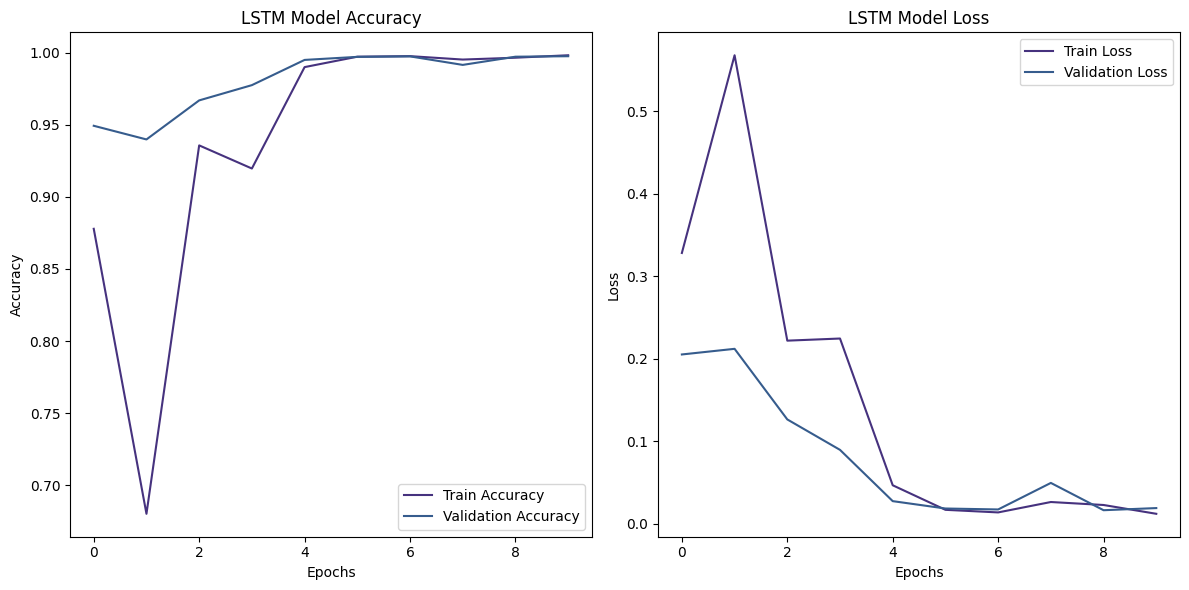

In [35]:
# Plotting LSTM History
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation (Confusion Matrix, Classification Report, etc.)

In [72]:
# LSTM Model Evaluation
lstm_predictions = (lstm_model.predict(X_test_lstm) > 0.5)
print("\nLSTM Classification Report:")
print(classification_report(y_test_lstm, lstm_predictions))

281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



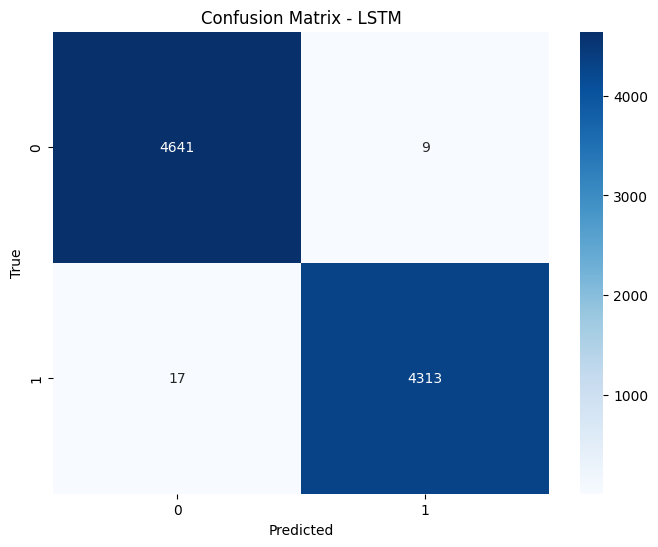

In [125]:
# Confusion Matrix Visualization for LSTM
cm_lstm = confusion_matrix(y_test_lstm, lstm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()